# CREATING AN AI MODEL

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tkinter as tk
from tkinter import messagebox
from sklearn.neighbors import KNeighborsRegressor

# Read the original data
df = pd.read_csv('data.csv')


# UNDERSTANDING THE DATA

In [2]:
print("my columns :" )
df.columns

my columns :


Index(['GOV', 'Level of government', 'TAX', 'Revenue category', 'YEA', 'Year',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [3]:
print("data shape :" )
df.shape

data shape :


(1728, 15)

In [4]:
print("Described data :" )
df.describe()

Described data :


,YEA,Year,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,1728.000000,1728.000000,1728.0,0.0,0.0,1728.000000,0.0,0.0
mean,2012.500000,2012.500000,6.0,NaN,NaN,1650.746302,NaN,NaN
std,5.189629,5.189629,0.0,NaN,NaN,2940.416337,NaN,NaN
min,2004.000000,2004.000000,6.0,NaN,NaN,-866.652000,NaN,NaN
25%,2008.000000,2008.000000,6.0,NaN,NaN,0.000000,NaN,NaN
50%,2012.500000,2012.500000,6.0,NaN,NaN,464.790000,NaN,NaN
75%,2017.000000,2017.000000,6.0,NaN,NaN,1857.219000,NaN,NaN
max,2021.000000,2021.000000,6.0,NaN,NaN,19131.238000,NaN,NaN


In [5]:
print("Unique Values :" )
df.nunique()

Unique Values :


GOV                        2
Level of government        2
TAX                       48
Revenue category          48
YEA                       18
Year                      18
Unit Code                  1
Unit                       1
PowerCode Code             1
PowerCode                  1
Reference Period Code      0
Reference Period           0
Value                    480
Flag Codes                 0
Flags                      0
dtype: int64

In [6]:
print("Data Types :" )
df.dtypes

Data Types :


GOV                       object
Level of government       object
TAX                       object
Revenue category          object
YEA                        int64
Year                       int64
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                    float64
Flag Codes               float64
Flags                    float64
dtype: object

# DATA CLEANING AND OUTLIERS 

In [7]:
#Listing Empty Columns
empty_columns = df.columns[df.isnull().all()].tolist()
print("Empty columns:")
print(empty_columns)

Empty columns:
['Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags']


In [8]:
#DROPPING EMPTY COLUMNS
# Specify columns to drop
columns_to_drop = ['YEA', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags']

# Drop the specified columns
df_dropped = df.drop(columns=columns_to_drop)

# Save the modified data to a new CSV file
df_dropped.to_csv('./mod_data/modified_data.csv', index=False)

In [9]:
# Read the modified data from the new CSV file
new_data = pd.read_csv('./mod_data/modified_data.csv')

# Display the

In [10]:
##checking the duplicates within a dataframe
duplicates = new_data.duplicated()

# Display rows that are duplicates
print("Duplicate rows:")
print(new_data[duplicates])

# Count the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

Duplicate rows:
Empty DataFrame
Columns: [GOV, Level of government, TAX, Revenue category, Year, Unit Code, Unit, PowerCode Code, PowerCode, Value]
Index: []
Number of duplicate rows: 0


In [11]:
#making new column names
new_data.rename(columns={
    'GOV': 'government',
    'Level of government': 'government_level',
    'TAX': 'tax',
    'Revenue category': 'revenue_category',
    'Year': 'year',
    'Unit Code': 'unit_code',
    'Unit': 'unit',
    'PowerCode Code': 'power_code_code',
    'PowerCode': 'power_code',
    'Value': 'value'
}, inplace=True)

#merging power_code_code with power_code to make it 6 million
new_data['power_code_code'] = 600000


# Display the DataFrame with the new column names
new_data


,government,government_level,tax,revenue_category,year,unit_code,unit,power_code_code,power_code,value
0,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2004,LSL,Loti,600000,Millions,4001.294
1,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2005,LSL,Loti,600000,Millions,4437.224
2,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2006,LSL,Loti,600000,Millions,6344.029
3,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2007,LSL,Loti,600000,Millions,6775.955
4,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2008,LSL,Loti,600000,Millions,8280.234
...,...,...,...,...,...,...,...,...,...,...
1723,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2017,LSL,Loti,600000,Millions,-631.698
1724,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2018,LSL,Loti,600000,Millions,-681.585
1725,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2019,LSL,Loti,600000,Millions,-866.652
1726,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2020,LSL,Loti,600000,Millions,-722.489


In [12]:
#dropping all unecessary values strings with with the similar value
new_data.drop(columns=['unit_code', 'unit', 'power_code'], inplace=True)
new_data.to_csv('./mod_data/clean_data.csv', index=False)
clean_data = pd.read_csv('./mod_data/clean_data.csv')
clean_data

,government,government_level,tax,revenue_category,year,power_code_code,value
0,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2004,600000,4001.294
1,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2005,600000,4437.224
2,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2006,600000,6344.029
3,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2007,600000,6775.955
4,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2008,600000,8280.234
...,...,...,...,...,...,...,...
1723,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2017,600000,-631.698
1724,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2018,600000,-681.585
1725,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2019,600000,-866.652
1726,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2020,600000,-722.489


# FINDING OUTLIERS

In [13]:


# Find outliers for each revenue_category
for category in clean_data['revenue_category'].unique():
    category_data = clean_data[clean_data['revenue_category'] == category]['value']
    q1 = category_data.quantile(0.25)
    q3 = category_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = category_data[(category_data < lower_bound) | (category_data > upper_bound)]
    if not outliers.empty:
        print(f"Outliers for '{category}':")
        print(outliers.values)
        print()

Outliers for '5120 Taxes on specific goods and services':
[305.235 285.478 420.088 543.692 305.235 285.478 420.088 543.692]

Outliers for 'Non-tax revenue: Sales of goods and services':
[256.17   62.872 256.17   62.872]

Outliers for 'Non-tax revenue: Fines, penalties and forfeits':
[17.08 17.08]

Outliers for 'Excise taxes collected on behalf of the SACU Common Revenue Pool':
[212.156 215.049 266.318 212.156 215.049 266.318]



In [14]:
import pandas as pd

# Assuming clean_data is your DataFrame and it is already loaded

# Step 1: Identify and print outliers for each revenue_category
outliers_index = []

for category in clean_data['revenue_category'].unique():
    category_data = clean_data[clean_data['revenue_category'] == category]['value']
    q1 = category_data.quantile(0.25)
    q3 = category_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = category_data[(category_data < lower_bound) | (category_data > upper_bound)]
    
    if not outliers.empty:
        print(f"Outliers for '{category}':")
        print(outliers.values)
        print()
        outliers_index.extend(outliers.index)

# Step 2: Remove all identified outliers from the DataFrame
clean_data_no_outliers = clean_data.drop(index=outliers_index)

# Display the new DataFrame without outliers
print(clean_data_no_outliers)


Outliers for '5120 Taxes on specific goods and services':
[305.235 285.478 420.088 543.692 305.235 285.478 420.088 543.692]

Outliers for 'Non-tax revenue: Sales of goods and services':
[256.17   62.872 256.17   62.872]

Outliers for 'Non-tax revenue: Fines, penalties and forfeits':
[17.08 17.08]

Outliers for 'Excise taxes collected on behalf of the SACU Common Revenue Pool':
[212.156 215.049 266.318 212.156 215.049 266.318]

     government               government_level              tax  \
0           FED  Federal or Central government            TOTAL   
1           FED  Federal or Central government            TOTAL   
2           FED  Federal or Central government            TOTAL   
3           FED  Federal or Central government            TOTAL   
4           FED  Federal or Central government            TOTAL   
...         ...                            ...              ...   
1723        NES                          Total  5111_L02_02_LSO   
1724        NES                  

In [15]:
# leave necessary columns only
clean_data_no_outliers = clean_data.drop(index=outliers_index)

clean_data_no_outliers = clean_data_no_outliers.drop(columns=['government', 'government_level','tax'])

# Display the new DataFrame without outliers and unused columns
print(clean_data_no_outliers)

clean_data_no_outliers.to_csv('./mod_data/clean_data_no_outliers.csv', index=False)

                   revenue_category  year  power_code_code     value
0     Total tax and non-tax revenue  2004           600000  4001.294
1     Total tax and non-tax revenue  2005           600000  4437.224
2     Total tax and non-tax revenue  2006           600000  6344.029
3     Total tax and non-tax revenue  2007           600000  6775.955
4     Total tax and non-tax revenue  2008           600000  8280.234
...                             ...   ...              ...       ...
1723       VAT - Domestic (Refunds)  2017           600000  -631.698
1724       VAT - Domestic (Refunds)  2018           600000  -681.585
1725       VAT - Domestic (Refunds)  2019           600000  -866.652
1726       VAT - Domestic (Refunds)  2020           600000  -722.489
1727       VAT - Domestic (Refunds)  2021           600000  -860.203

[1708 rows x 4 columns]


In [16]:
working_data = pd.read_csv('./mod_data/clean_data_no_outliers.csv')
working_data

,revenue_category,year,power_code_code,value
0,Total tax and non-tax revenue,2004,600000,4001.294
1,Total tax and non-tax revenue,2005,600000,4437.224
2,Total tax and non-tax revenue,2006,600000,6344.029
3,Total tax and non-tax revenue,2007,600000,6775.955
4,Total tax and non-tax revenue,2008,600000,8280.234
...,...,...,...,...
1703,VAT - Domestic (Refunds),2017,600000,-631.698
1704,VAT - Domestic (Refunds),2018,600000,-681.585
1705,VAT - Domestic (Refunds),2019,600000,-866.652
1706,VAT - Domestic (Refunds),2020,600000,-722.489


# FEATURE ENGINEERING

In [21]:
#SCALING THE DATA TO -1 TO 1
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'value' column
working_data['value'] = scaler.fit_transform(working_data[['value']])
# Save the scaled data to a CSV file
working_data.to_csv('./mod_data/scaled_data.csv', index=False)

In [22]:
working_data

,revenue_category,year,power_code_code,value,mean_value
0,Total tax and non-tax revenue,2004,600000,0.243423,0.625024
1,Total tax and non-tax revenue,2005,600000,0.265222,0.625024
2,Total tax and non-tax revenue,2006,600000,0.360572,0.625024
3,Total tax and non-tax revenue,2007,600000,0.382171,0.625024
4,Total tax and non-tax revenue,2008,600000,0.457393,0.625024
...,...,...,...,...,...
1703,VAT - Domestic (Refunds),2017,600000,0.011749,0.023054
1704,VAT - Domestic (Refunds),2018,600000,0.009254,0.023054
1705,VAT - Domestic (Refunds),2019,600000,0.000000,0.023054
1706,VAT - Domestic (Refunds),2020,600000,0.007209,0.023054


In [23]:

# Calculate the mean value for each revenue_category and create a new column for it
working_data['mean_value'] = working_data.groupby('revenue_category')['value'].transform('mean')
working_data

,revenue_category,year,power_code_code,value,mean_value
0,Total tax and non-tax revenue,2004,600000,0.243423,0.625024
1,Total tax and non-tax revenue,2005,600000,0.265222,0.625024
2,Total tax and non-tax revenue,2006,600000,0.360572,0.625024
3,Total tax and non-tax revenue,2007,600000,0.382171,0.625024
4,Total tax and non-tax revenue,2008,600000,0.457393,0.625024
...,...,...,...,...,...
1703,VAT - Domestic (Refunds),2017,600000,0.011749,0.023054
1704,VAT - Domestic (Refunds),2018,600000,0.009254,0.023054
1705,VAT - Domestic (Refunds),2019,600000,0.000000,0.023054
1706,VAT - Domestic (Refunds),2020,600000,0.007209,0.023054


# DATA VISUALIZATION

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'categories' is a list of your revenue categories
# and 'working_data' is your DataFrame

for category in categories:
    category_data = working_data[working_data['revenue_category'] == category]
    cumulative_data = category_data.groupby('year')['value'].sum().cumsum().reset_index()
    
    plt.figure(figsize=(12, 6))
    
    # Line plot
    sns.lineplot(x='year', y='value', data=cumulative_data, label='Line Plot')
    
    # Scatter plot
    sns.scatterplot(x='year', y='value', data=cumulative_data, color='red', label='Scatter Plot')
    
    plt.xlabel('Year')
    plt.ylabel('Cumulative Value')
    plt.title(f'Cumulative Revenue for {category} over the Years')
    plt.legend()
    plt.show()


NameError: name 'categories' is not defined

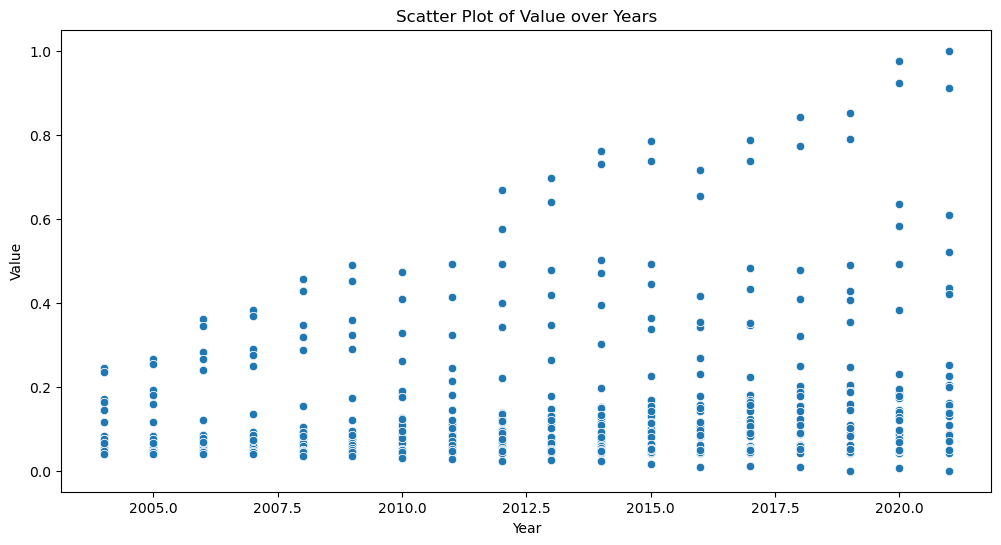

In [25]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='value', data=working_data)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Scatter Plot of Value over Years')
plt.show()


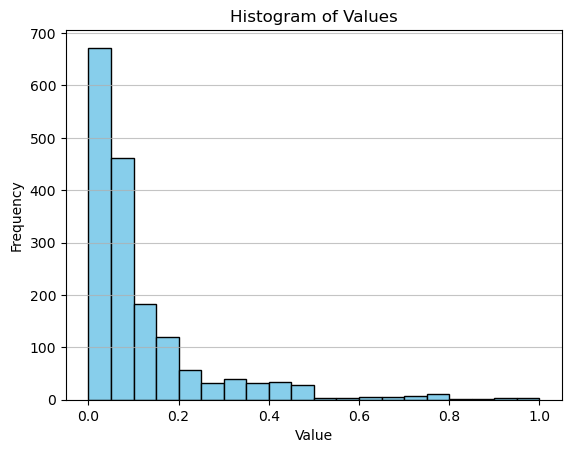

In [26]:
# Assuming clean_data has 'value' and 'year' columns
plt.hist(working_data['value'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.grid(axis='y', alpha=0.75)
plt.show()

C:\Users\Moratuoa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Moratuoa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


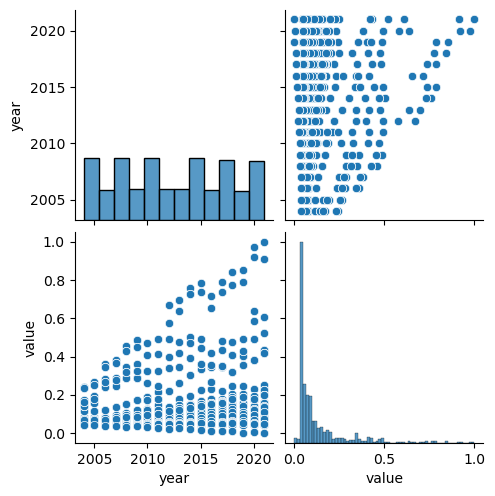

In [27]:
# Assuming 'data' is your DataFrame
sns.pairplot(working_data[['year', 'value']])
plt.show()

# USING KNN(KNeighbosRegressor) to predict missing values

In [28]:
# Split data into training and test sets
train_data, test_data = train_test_split(working_data, test_size=0.2, random_state=42)

# Drop unnecessary columns for KNN
train_X = train_data.drop(['revenue_category', 'value'], axis=1)
train_y = train_data['value']
test_X = test_data.drop(['revenue_category', 'value'], axis=1)

# Train KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(train_X, train_y)

# Predict missing values
test_data['value'] = knn.predict(test_X)

# Update original DataFrame with predicted values
working_data.update(test_data)

# Display updated DataFrame
working_data

working_data.to_csv('./mod_data/training_data.csv')

# TRAINING AND EVALUATING THE MODEL

In [29]:
train = pd.read_csv('./mod_data/training_data.csv')
train

,Unnamed: 0,revenue_category,year,power_code_code,value,mean_value
0,0,Total tax and non-tax revenue,2004,600000,0.243423,0.625024
1,1,Total tax and non-tax revenue,2005,600000,0.265222,0.625024
2,2,Total tax and non-tax revenue,2006,600000,0.360572,0.625024
3,3,Total tax and non-tax revenue,2007,600000,0.382171,0.625024
4,4,Total tax and non-tax revenue,2008,600000,0.457393,0.625024
...,...,...,...,...,...,...
1703,1703,VAT - Domestic (Refunds),2017,600000,0.011749,0.023054
1704,1704,VAT - Domestic (Refunds),2018,600000,0.009254,0.023054
1705,1705,VAT - Domestic (Refunds),2019,600000,0.000000,0.023054
1706,1706,VAT - Domestic (Refunds),2020,600000,0.007209,0.023054


In [37]:


# Assuming 'clean_data' is your DataFrame
revenue_category_input = input("Enter the revenue category: ")
year_input = int(input("Enter the year to predict for: "))

try:
    # Filter the data for the specified revenue_category
    revenue_data = clean_data[clean_data['revenue_category'] == revenue_category_input]

    # Split the data into features (X) and target variable (y)
    X = revenue_data[['year']]
    y = revenue_data['value']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Save the model to a file
    with open('RSLModel.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)

    # Make predictions for the specified year
    X_future = pd.DataFrame({'year': [year_input]})
    future_value = model.predict(X_future)

    # Calculate the model's accuracy
    y_pred = model.predict(X_test)
    accuracy = r2_score(y_test, y_pred)*100

    print("Predicted value for {}: {}".format(year_input, future_value[0]))
    print("Model Accuracy (R-squared): {:.2f} %".format(accuracy))
except Exception as e:
    print(f"An error occurred: {e}")


Enter the revenue category: Total tax and non-tax revenue
Enter the year to predict for: 2022
Predicted value for 2022: 19757.400894189952
Model Accuracy (R-squared): 94.39 %


In [33]:
train

,Unnamed: 0,revenue_category,year,power_code_code,value,mean_value
0,0,Total tax and non-tax revenue,2004,600000,0.243423,0.625024
1,1,Total tax and non-tax revenue,2005,600000,0.265222,0.625024
2,2,Total tax and non-tax revenue,2006,600000,0.360572,0.625024
3,3,Total tax and non-tax revenue,2007,600000,0.382171,0.625024
4,4,Total tax and non-tax revenue,2008,600000,0.457393,0.625024
...,...,...,...,...,...,...
1703,1703,VAT - Domestic (Refunds),2017,600000,0.011749,0.023054
1704,1704,VAT - Domestic (Refunds),2018,600000,0.009254,0.023054
1705,1705,VAT - Domestic (Refunds),2019,600000,0.000000,0.023054
1706,1706,VAT - Domestic (Refunds),2020,600000,0.007209,0.023054
